In [1]:
# PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts
!nvidia-smi -L

# import os
# os.environ['TF_USE_LEGACY_KERAS'] = '1'

/usr/bin/sh: 1: nvidia-smi: not found


Keras 3
Keras 3 will be the default Keras version for TensorFlow 2.16 onwards. You may need to update your script to use Keras 3. Please refer to the new Keras documentation for Keras 3 (https://keras.io/keras_3). Keras 2 will continue to be released alongside TensorFlow as tf_keras. To continue using Keras 2 with TensorFlow 2.16+:

Install tf-keras vía pip install tf-keras~=2.16
Switch tf.keras to use Keras 2 (tf-keras), by setting environment variable TF_USE_LEGACY_KERAS=1 directly or in your Python program by doing import os;os.environ["TF_USE_LEGACY_KERAS"]=”1”. Please note that this needs to be set before importing TensorFlow and will set it for all packages in your Python

In [2]:
    import tensorflow as tf
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

E0000 00:00:1750433966.223330      10 common_lib.cc:612] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:230


Num GPUs Available:  0


In [3]:
# get the data 
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 40.10 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [4]:
!wget https://raw.githubusercontent.com/azhermurad/Deep_Learning_with_TensorFlow/refs/heads/main/helper_functions.py

--2025-06-20 15:39:50--  https://raw.githubusercontent.com/azhermurad/Deep_Learning_with_TensorFlow/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3154 (3.1K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   3.08K  --.-KB/s    in 0s      

2025-06-20 15:39:50 (51.3 MB/s) - ‘helper_functions.py’ saved [3154/3154]



In [5]:
data_dir = "/kaggle/working/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"


In [6]:
import os
train_data, dev_data, test_data = [data_dir + x for x in  os.listdir(data_dir)]

In [7]:
train_data

'/kaggle/working/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt'

In [8]:
def get_lines(filename:str):
    """
    Read File using filename and return the lines of text as list

    
    Args:
        filename: a string name of the file
    Returns:
        A list of strings with one string perline
    """
    with open(filename,"r") as file:
        return  file.readlines()
         

```
[{
line_number:0,
target: BACKGROUND,
text: Emotional eating is associated with overeating and the developement of obesity
total_lines: 11
}]
```

In [9]:
def preprocessing_text(filepath):
    result = []
    current = []
    data=[]

    lines = get_lines(filepath)
    
    for item in lines:
        if item.startswith("###"):
            if current:  # Avoid appending empty list at the start
                result.append(current)
            current = []
        else:
            if item.isspace():
                continue
            current.append(item)
    
    
    if current:
        result.append(current)
    
    for abstract  in result:
        for line_number,line_text in enumerate(abstract):
            target, label = line_text.split("\t")
            value ={
                "line_number":line_number,
                "target":target,
                "text":label,
                "total_lines":len(abstract)-1
        
            }
    
            data.append(value)
    return data
            
    
    

In [10]:
%%time

train_sample = preprocessing_text(data_dir + "train.txt")
test_sample = preprocessing_text(data_dir + "test.txt")
dev_sample = preprocessing_text(data_dir + "dev.txt")

print(len(train_sample),len(test_sample),len(dev_sample))

180040 30135 30212
CPU times: user 292 ms, sys: 110 ms, total: 402 ms
Wall time: 400 ms


In [11]:
import pandas as pd


train_df = pd.DataFrame(train_sample)
test_df = pd.DataFrame(test_sample)
dev_df = pd.DataFrame(dev_sample)
   
# train_df.groupby("target").count()

In [12]:
train_df[:18]

,line_number,target,text,total_lines
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,A total of @ patients with primary knee OA wer...,11
2,2,METHODS,Outcome measures included pain reduction and i...,11
3,3,METHODS,Pain was assessed using the visual analog pain...,11
4,4,METHODS,Secondary outcome measures included the Wester...,11
5,5,METHODS,"Serum levels of interleukin @ ( IL-@ ) , IL-@ ...",11
6,6,RESULTS,There was a clinically relevant reduction in t...,11
7,7,RESULTS,The mean difference between treatment arms ( @...,11
8,8,RESULTS,"Further , there was a clinically relevant redu...",11
9,9,RESULTS,These differences remained significant at @ we...,11


<Axes: xlabel='target'>

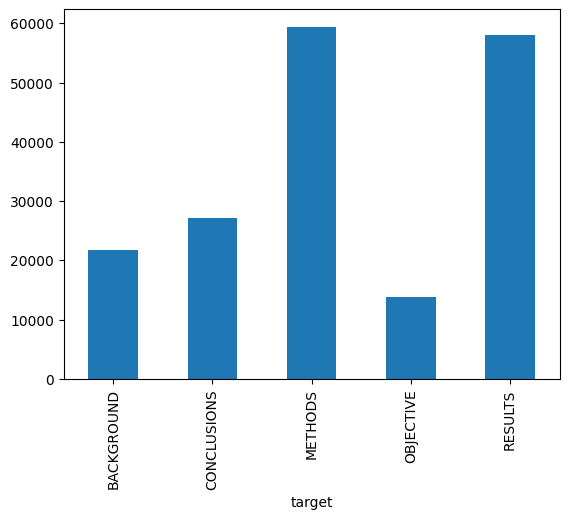

In [13]:
train_df.groupby("target")["text"].count().plot(kind="bar")

In [14]:
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

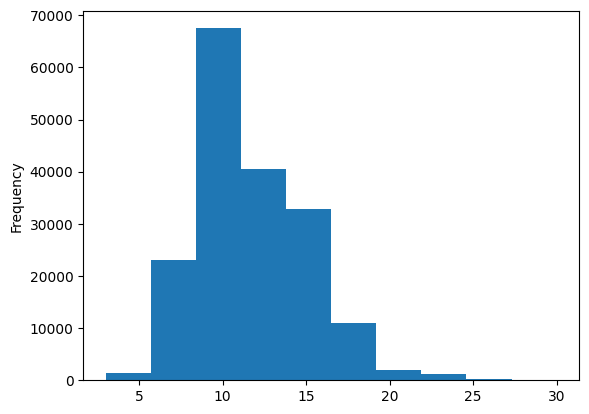

In [15]:
train_df.total_lines.plot(kind="hist")

In [16]:
train_df["sentence_token"]= train_df["text"].apply(lambda x: len(x.split(" ")))
train_df.head(3)

,line_number,target,text,total_lines,sentence_token
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,11,49
1,1,METHODS,A total of @ patients with primary knee OA wer...,11,27
2,2,METHODS,Outcome measures included pain reduction and i...,11,15


<Axes: ylabel='Frequency'>

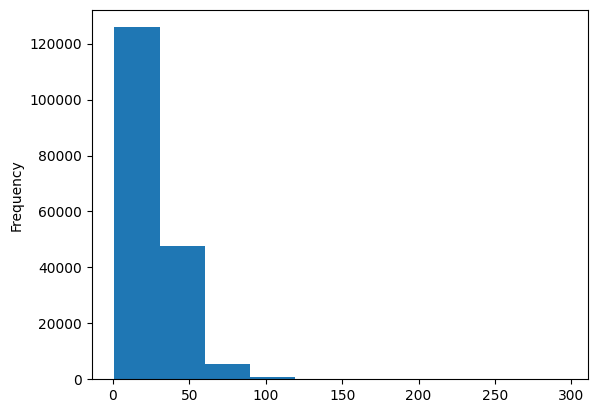

In [17]:
# Number of token per sentence 
train_df["sentence_token"].plot.hist()

In [18]:
# Get the list of sentence 
train_sentences = train_df.text.to_numpy()
test_sentences = test_df.text.to_numpy()
dev_sentences = dev_df.text.to_numpy()

len(train_sentences),len(test_sentences),len(dev_sentences)

(180040, 30135, 30212)

In [19]:
train_sentences

array(['To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
       'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
       'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
       ...,
       'Both strategies had acceptable side effect profiles , with a low incidence oflaboratory abnormalities and cardiovascular events .\n',
       'Compared with standard statin monotherapy , the combination of statin plus ezetimibe showed greater coronary plaque regression , which might be attributed to cholesterol absorption inhibition-induced aggressive lipid lowering .\n',
       '( Plaque Regression With Chole

In [20]:
import numpy as np
np.mean(train_df["sentence_token"])

np.float64(26.338269273494777)

## OneHotEncoder

In [21]:
# one hot encoded
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
enc = OneHotEncoder(sparse_output=False)
train_label_one_hot = enc.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
test_label_one_hot = enc.transform(test_df["target"].to_numpy().reshape(-1,1))
dev_label_one_hot = enc.transform(dev_df["target"].to_numpy().reshape(-1,1))

train_label_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [22]:
print(enc.categories_)

[array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)]


In [23]:
train_label_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

##  LabelEncoder 

In [24]:
label_encoder = LabelEncoder()
train_label_encoder =  label_encoder.fit_transform(train_df["target"])
test_label_encoder =  label_encoder.transform(test_df["target"])
dev_label_encoder =  label_encoder.transform(dev_df["target"])

In [25]:
dev_label_encoder

array([0, 0, 3, ..., 4, 1, 1])

In [26]:
# get classes 

num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Model_0: Naive_Bayes Using TFIDF


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 


In [28]:
model_0= Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', MultinomialNB())
])

model_0.fit(train_sentences,train_label_encoder)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
model_0.score(dev_sentences, dev_label_encoder)

0.7218323844829869

In [30]:
model_0_pred = model_0.predict(dev_sentences)

In [31]:
from helper_functions import calculate_results

### Model_0 Results

In [32]:
model_0_result =calculate_results(dev_label_encoder, model_0_pred)
model_0_result

{'accuracy': 0.7218323844829869,
 'precison': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1_score': 0.6989250353450294}

## Model_1 (Conv1D with token embeddings)

### Vectorization

In [33]:
import numpy as np
sentence_token = train_df["sentence_token"].tolist()
print(max(sentence_token))
print(min(sentence_token))
print(np.percentile(sentence_token,95)) # 95% of sentence token are less than 55 
output_sequence_length =np.percentile(sentence_token,95)

# np.percentile(a, 95)output_sequence_length


296
1
55.0


In [34]:

# TextVectorization layer is used to map text features into integer sequence
# A preprocessing layer which maps text features to integer sequences.
max_tokens = 68000
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_tokens,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=int(output_sequence_length),
)

I0000 00:00:1750434001.250523      10 service.cc:148] XLA service 0x5837a5e04020 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750434001.250569      10 service.cc:156]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1750434001.250574      10 service.cc:156]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1750434001.250576      10 service.cc:156]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1750434001.250579      10 service.cc:156]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1750434001.250582      10 service.cc:156]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1750434001.250585      10 service.cc:156]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1750434001.250588      10 service.cc:156]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1750434001.250590      10 service.cc:156]   StreamExecutor device (7): TPU, 2a886c8


In [35]:
vectorize_layer.adapt(train_sentences)

In [36]:
import random
random_sentence =random.choices(train_sentences)
print(f""" Text: {random_sentence[0]}
Length: {len(random_sentence[0].split(" "))}
vectorizer: {vectorize_layer(random_sentence)}
length {len(vectorize_layer(random_sentence)[0])}
""")

 Text: clinicaltrials.gov : NCT@ .

Length: 4
vectorizer: [[275 176   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]]
length 55



In [37]:
# print(vectorize_layer.get_vocabulary()[2371])

print(f"""
VOCALULARY_SIZE: {vectorize_layer.vocabulary_size()}

MOST COMMON WORDS: {vectorize_layer.get_vocabulary()[:5]}

MOST WORST WORDS: {vectorize_layer.get_vocabulary()[-5:]}
""")


VOCALULARY_SIZE: 64841

MOST COMMON WORDS: ['', '[UNK]', np.str_('the'), np.str_('and'), np.str_('of')]

MOST WORST WORDS: [np.str_('aainduced'), np.str_('aaigroup'), np.str_('aachener'), np.str_('aachen'), np.str_('aaacp')]



In [38]:
vectorize_layer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

### Embedding

mask_zero=True:
mask_zero=True is used to tell the model to ignore padding tokens (i.e., input tokens with value 0) when training.

🔍 Purpose of mask_zero=True
In NLP and sequence modeling, sequences are often padded to the same length for batch processing. The padding is usually done with the index 0. However, we don’t want the model to learn anything from these padding tokens.

Setting mask_zero=True tells the Embedding layer to create a mask such that downstream layers (like RNNs or Transformers) will ignore these padding positions.

In [39]:
embedding_layer = tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=128,
        mask_zero=True
    
)

print(f"""
Sentence: {random_sentence[0]}

tokenization: {vectorize_layer(random_sentence)}

embedding: {embedding_layer(vectorize_layer(random_sentence[0]))}
embedding_Size: {embedding_layer(vectorize_layer(random_sentence[0])).shape}

""")



Sentence: clinicaltrials.gov : NCT@ .


tokenization: [[275 176   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]]

embedding: [[-0.04786411 -0.00799096  0.03054238 ... -0.01333469  0.01036735
  -0.01543016]
 [-0.0351017  -0.00171075  0.00513779 ... -0.03116596 -0.02994117
  -0.01350281]
 [-0.04551701 -0.04200561  0.02171515 ...  0.03779688 -0.00384801
   0.04283119]
 ...
 [-0.04551701 -0.04200561  0.02171515 ...  0.03779688 -0.00384801
   0.04283119]
 [-0.04551701 -0.04200561  0.02171515 ...  0.03779688 -0.00384801
   0.04283119]
 [-0.04551701 -0.04200561  0.02171515 ...  0.03779688 -0.00384801
   0.04283119]]
embedding_Size: (55, 128)




## Data Input Pipeline

In [40]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_label_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences,test_label_one_hot))
dev_dataset= tf.data.Dataset.from_tensor_slices((dev_sentences,dev_label_one_hot))

In [41]:
train_label_one_hot[:3]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [42]:
# convert the dataset to batch and prefetch for fast loading
# train_dataset.batch(32).prefetch(2)
# THIS WILL FETCH 2 BATCH(32 ELEMENTS EACH)
train_dataset =  train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset =  test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
dev_dataset =  dev_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [43]:
len(train_dataset)

5627

In [44]:
# model_1 =  tf.keras.Sequential([
#     tf.keras.Input(shape=(1,),dtype=tf.string),
#     vectorize_layer,
#     embedding_layer,
#     # tf.keras.layers.Masking(mask_value=0), 
#     tf.keras.layers.Conv1D(64,3,activation="relu"),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(num_classes,activation="softmax")
# ])

# model_1.summary()


input_l =  tf.keras.Input(shape=(1,),dtype=tf.string)
x = vectorize_layer(input_l)
x=  embedding_layer(x)
# three words look at a time 
x= tf.keras.layers.Conv1D(64,3,activation="relu")(x)
x =tf.keras.layers.GlobalAveragePooling1D()(x)
output =tf.keras.layers.Dense(num_classes,activation="softmax")(x)

model_1= tf.keras.Model(input_l, output )



/usr/local/lib/python3.10/site-packages/keras/src/layers/layer.py:940: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [45]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [46]:
0.1* len(train_dataset)

562.7

In [47]:

history_1 = model_1.fit(train_dataset ,epochs=5,
                    steps_per_epoch=int(0.1* len(train_dataset)), # only 10% of batches
                    validation_data=dev_dataset)

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.4958 - loss: 1.2081 - val_accuracy: 0.7226 - val_loss: 0.7189
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7339 - loss: 0.7071 - val_accuracy: 0.7608 - val_loss: 0.6587
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7589 - loss: 0.6421 - val_accuracy: 0.7763 - val_loss: 0.6225
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7738 - loss: 0.6198 - val_accuracy: 0.7763 - val_loss: 0.5997
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7801 - loss: 0.6053 - val_accuracy: 0.7941 - val_loss: 0.5785


In [48]:
# evaluate on whole validation dataset 

model_1.evaluate(dev_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7939 - loss: 0.5765


[0.578453779220581, 0.7940553426742554]

In [49]:
# prediction ignore the labels

model_1_pred = model_1.predict(dev_dataset)
model_1_pred = np.argmax(model_1_pred,axis=1)

945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [50]:
model_1_result = calculate_results(dev_label_encoder, model_1_pred)
model_1_result

{'accuracy': 0.7940553422481134,
 'precison': 0.7930970995240813,
 'recall': 0.7940553422481134,
 'f1_score': 0.7907193542049127}

In [51]:
model_0_result

{'accuracy': 0.7218323844829869,
 'precison': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1_score': 0.6989250353450294}

## MODEL 2 (UNIVERSAL SENTENCE ENCODER)
1- Universal sentence encoder

2- BERT

In [52]:
import tensorflow_hub as hub
# url = 'https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2'

url = 'https://tfhub.dev/google/universal-sentence-encoder/4'
encoder = hub.KerasLayer(
    url,
    input_shape=[],
    dtype=tf.string,
    trainable = False,
    
)

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
#   import tensorflow_hub as hub
# url = 'https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2'
# universal_encoder = hub.KerasLayer(url,
#     input_shape=[],
#     dtype=tf.string,
#     trainable=False,
#     name="USE")

In [54]:
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"

# Loading the Model
url = "/kaggle/input/universal-sentence-encoder/tensorflow2/universal-sentence-encoder/2"

universal_encoder = hub.KerasLayer(
    url,
    input_shape=[],
    dtype=tf.string,
    trainable=False,
    name="USE")

class UniversalEncoderLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return universal_encoder(inputs)


In [55]:
# Input Layer

# os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"

input_layer = tf.keras.layers.Input(shape=[], dtype=tf.string)

# Hub Layers
hub_encoding = UniversalEncoderLayer()(input_layer)


# Downstream Layers
dense_1 = tf.keras.layers.Dense(64, activation="relu")(hub_encoding)
dense_1 = tf.keras.layers.BatchNormalization()(dense_1)
dense_1 = tf.keras.layers.Dropout(0.5)(dense_1)
output_layer = tf.keras.layers.Dense(num_classes, activation="softmax")(dense_1)
model_2 = tf.keras.Model(inputs=input_layer,outputs = output_layer)

model_2.summary()





Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ universal_encoder_layer         │ (None, 512)            │             0 │
│ (UniversalEncoderLayer)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,413 (130.52 KB)

 Trainable params: 33,285 (130.02 KB)

 Non-trainable params: 128 (512.00 B)

In [56]:
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'],
              jit_compile=False,
               )



history_2 = model_2.fit(train_dataset ,epochs=5,
                    steps_per_epoch=int(0.1* len(train_dataset)), # only 10% of batches
                    validation_data=dev_dataset)

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.5319 - loss: 1.2042 - val_accuracy: 0.6873 - val_loss: 0.8238
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.6675 - loss: 0.8604 - val_accuracy: 0.7099 - val_loss: 0.7525
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.6793 - loss: 0.8307 - val_accuracy: 0.7153 - val_loss: 0.7419
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.6935 - loss: 0.8106 - val_accuracy: 0.7222 - val_loss: 0.7277
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.6926 - loss: 0.8029 - val_accuracy: 0.7272 - val_loss: 0.7137


In [57]:
model_2.evaluate(dev_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7248 - loss: 0.7133


[0.7137451171875, 0.7272275686264038]

In [58]:
model_2_pred = model_2.predict(dev_dataset)
model_2_pred = np.argmax(model_2_pred,axis=1)

945/945 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


In [59]:
model_2_result = calculate_results(dev_label_encoder, model_2_pred)
model_2_result

{'accuracy': 0.7272275916854231,
 'precison': 0.7212468158323448,
 'recall': 0.7272275916854231,
 'f1_score': 0.722224594614955}

In [60]:
model_1_result

{'accuracy': 0.7940553422481134,
 'precison': 0.7930970995240813,
 'recall': 0.7940553422481134,
 'f1_score': 0.7907193542049127}

## FINE TUNE (UNIVERSAL SENTENCE ENCODER)


In [61]:

universal_encoder = hub.KerasLayer(
    url,
    input_shape=[],
    dtype=tf.string,
    trainable=True,
    name="USE")

class UniversalEncoderLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        return universal_encoder(inputs)

input_layer = tf.keras.layers.Input(shape=[], dtype=tf.string)

# Hub Layers
hub_encoding = UniversalEncoderLayer()(input_layer)

# Downstream Layers
dense_1 = tf.keras.layers.Dense(64, activation="relu")(hub_encoding)
dense_1 = tf.keras.layers.BatchNormalization()(dense_1)
dense_1 = tf.keras.layers.Dropout(0.5)(dense_1)

# dense_2 = tf.keras.layers.Dense(32, activation="relu")(dense_1)
# dense_2 = tf.keras.layers.BatchNormalization()(dense_2)
# dense_2 = tf.keras.layers.Dropout(0.5)(dense_2)
# Output Layer
output_layer = tf.keras.layers.Dense(num_classes, activation="softmax")(dense_1)

# Constructing the Model with the pretrained hub_model
use_finetune = tf.keras.models.Model(
    inputs=[input_layer], outputs=[output_layer]
)


use_finetune.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ universal_encoder_layer_1       │ (None, 512)            │             0 │
│ (UniversalEncoderLayer)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,413 (130.52 KB)

 Trainable params: 33,285 (130.02 KB)

 Non-trainable params: 128 (512.00 B)

In [62]:
use_finetune.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'],
              jit_compile=False,
               )



history_use_finetune = use_finetune.fit(train_dataset ,epochs=5,
                    steps_per_epoch=int(0.1* len(train_dataset)), # only 10% of batches
                    validation_data=dev_dataset)

Epoch 1/5


/usr/local/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_13']
Received: inputs=Tensor(shape=(None,))
  warnings.warn(msg)


562/562 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.5396 - loss: 1.2135 - val_accuracy: 0.6902 - val_loss: 0.8257
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.6715 - loss: 0.8575 - val_accuracy: 0.7087 - val_loss: 0.7541
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.6850 - loss: 0.8410 - val_accuracy: 0.7131 - val_loss: 0.7400
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.6867 - loss: 0.8041 - val_accuracy: 0.7235 - val_loss: 0.7229
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6960 - loss: 0.8025 - val_accuracy: 0.7250 - val_loss: 0.7123


In [63]:
use_finetune.evaluate(dev_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7231 - loss: 0.7138


[0.7123129367828369, 0.7250430583953857]

## Model_3 (BERT Bidirectional Encoder Representations From Transformer)

Encoder-Decoder Architectures:

Sequence-to-Sequence:

Encoder-decoder architectures are commonly used for sequence-to-sequence tasks, where the input and output are variable-length sequences. 
The encoder converts the input into a fixed-size representation, and the decoder generates the output based on this representation. 

Encoder-Only Architectures:

Contextual Understanding:

Encoder-only architectures are often preferred for tasks that require deep understanding and contextual analysis, such as classification and information extraction. 
BERT and Variants:
BERT (Bidirectional Encoder Representations from Transformers) and its variants (like RoBERTa) are prominent examples of encoder-only architectures used for natural language processing tasks. 

In [64]:
import tensorflow_text as text
preprocessor_model = hub.KerasLayer(
    "https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3")

bert_model = hub.KerasLayer(
    "https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/bert-en-uncased-l-10-h-128-a-2/2",
    trainable=True)

class Preprocess_Layer(tf.keras.layers.Layer):
    def call(self, inputs):
        return preprocessor_model(inputs)

class Bert_Embedding_Layer(tf.keras.layers.Layer):
    def call(self, _inputs):
        return bert_model(_inputs)



In [65]:

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
encoder_inputs = Preprocess_Layer()(text_input)
outputs = Bert_Embedding_Layer()(encoder_inputs)
# For the fine-tuning you are going to use the pooled_output array.
net = outputs['pooled_output']
net = tf.keras.layers.Dropout(0.1)(net)
net = tf.keras.layers.Dense(num_classes, activation="softmax", name='classifier')(net)
model_3 = tf.keras.Model(text_input, net)
model_3.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text (InputLayer)   │ (None)            │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ preprocess__layer   │ [(None, 128),     │          0 │ text[0][0]        │
│ (Preprocess_Layer)  │ (None, 128),      │            │                   │
│                     │ (None, 128)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert__embedding__l… │ [(None, 128),     │          0 │ preprocess__laye… │
│ (Bert_Embedding_La… │ (None, 128, 128), │            │ preprocess__laye… │
│                     │ (None, 128, 128), │            │ preprocess__laye… │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128, 128), │            │                   │
│                     │ (None, 128),      │            │                   │
│                     │ (None, 128, 128)] │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ bert__embedding_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classifier (Dense)  │ (None, 5)         │        645 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 645 (2.52 KB)

 Trainable params: 645 (2.52 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'],
              jit_compile=False,
               )



history_3 = model_3.fit(train_dataset ,epochs=5,
                    steps_per_epoch=int(0.1* len(train_dataset)), # only 10% of batches
                    validation_data=dev_dataset)

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 295s 515ms/step - accuracy: 0.4023 - loss: 1.4331 - val_accuracy: 0.5482 - val_loss: 1.1688
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 290s 516ms/step - accuracy: 0.5206 - loss: 1.1754 - val_accuracy: 0.5837 - val_loss: 1.0814
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 289s 515ms/step - accuracy: 0.5573 - loss: 1.1106 - val_accuracy: 0.5949 - val_loss: 1.0382
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 289s 515ms/step - accuracy: 0.5629 - loss: 1.0817 - val_accuracy: 0.6057 - val_loss: 1.0118
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 289s 514ms/step - accuracy: 0.5799 - loss: 1.0478 - val_accuracy: 0.6116 - val_loss: 0.9920


In [67]:
model_3.evaluate(dev_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 183s 194ms/step - accuracy: 0.6097 - loss: 0.9904


[0.9919992685317993, 0.6116113066673279]

In [68]:
model_3_pred = model_3.predict(dev_dataset)
model_3_pred = np.argmax(model_3_pred,axis=1)

945/945 ━━━━━━━━━━━━━━━━━━━━ 184s 194ms/step


In [69]:
model_3_result = calculate_results(dev_label_encoder, model_3_pred)
model_3_result

{'accuracy': 0.6116112802859791,
 'precison': 0.6023472219273798,
 'recall': 0.6116112802859791,
 'f1_score': 0.5906208673990668}

## Model_4: Conv1D With Character Embedding

In [70]:
train_sentences[0:5]

array(['To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
       'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
       'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
       'Pain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
       'Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n'],
      dtype=object)

In [71]:
a= ["1","2","3"]
"  ".join(a)

'1  2  3'

In [72]:
def split_chars(text:str):
    return " ".join(list(text))

train_chars = [ split_chars(x) for x in train_sentences ]
test_chars = [ split_chars(x) for x in test_sentences ]
dev_chars = [ split_chars(x) for x in dev_sentences ]


In [73]:
# average of charts length 
chars_len = [len(sentence) for sentence in train_sentences ]
mean_char_len = np.mean(chars_len)
mean_char_len



np.float64(150.3662574983337)

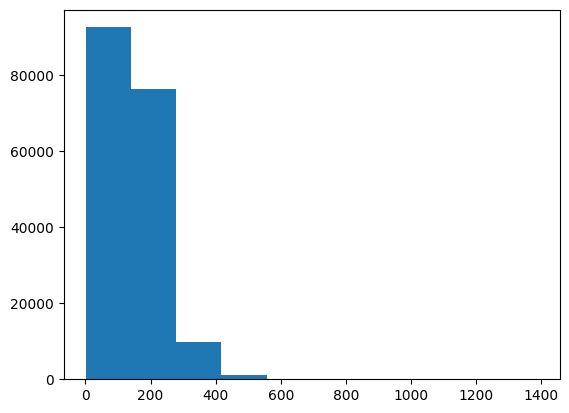

In [74]:
# check the distribution of the character-level 
import matplotlib.pyplot as plt
plt.hist(chars_len)
plt.show()

In [75]:
# Find what character length cover 95% of sequences
output_seq_char_len = int(np.percentile(chars_len,95))
output_seq_char_len

291

In [76]:
# vocabulary size
import string
max_tokens = string.ascii_lowercase + string.digits + string.punctuation
max_tokens = len(max_tokens) + 2
max_tokens

70

In [77]:
# Create the layer.
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=output_seq_char_len
)

vectorize_layer.adapt(train_chars)

In [78]:
print(f"""
Number of different character in character vocab: {vectorize_layer.vocabulary_size()}
Five most commont chars: { vectorize_layer.get_vocabulary()[:6]}
Five least commont chars: { vectorize_layer.get_vocabulary()[-5:]}

""")


Number of different character in character vocab: 28
Five most commont chars: ['', '[UNK]', np.str_('e'), np.str_('t'), np.str_('i'), np.str_('a')]
Five least commont chars: [np.str_('k'), np.str_('x'), np.str_('z'), np.str_('q'), np.str_('j')]




In [79]:
# for testing 
vectorize_layer(train_chars[0])

<tf.Tensor: shape=(291,), dtype=int64, numpy=
array([ 3,  7,  4,  6, 21,  2,  9,  3,  4, 18,  5,  3,  2,  3, 13,  2,  2,
       17, 17,  4, 11,  5, 11, 19,  7, 17, 20,  2,  2, 23,  9,  7, 17, 10,
        5,  4, 12, 19, 12,  7, 20, 10,  7,  9,  2,  7,  8,  5, 12, 14,  8,
        2, 10,  6,  4,  9,  7, 12,  7,  6,  2,  4,  6,  4, 15, 14,  8,  7,
       21,  4,  6, 18, 14,  5,  4,  6, 15,  7, 22,  4, 12,  4,  3, 19,  5,
        6, 10,  9, 19,  9,  3,  2, 15,  4, 11, 12,  7, 20, 18,  8,  5, 10,
        2,  4,  6, 17, 12,  5, 15, 15,  5,  3,  4,  7,  6,  4,  6,  3, 13,
        2,  9, 13,  7,  8,  3,  3,  2,  8, 15,  5,  6, 10, 20, 13,  2,  3,
       13,  2,  8,  3, 13,  2,  2, 17, 17,  2, 11,  3, 20,  7, 16, 12, 10,
       22,  2,  9, 16,  9,  3,  5,  4,  6,  2, 10,  5,  3, 20,  2,  2, 23,
        9,  4,  6,  7, 12, 10,  2,  8,  5, 10, 16, 12,  3,  9, 20,  4,  3,
       13, 15,  7, 10,  2,  8,  5,  3,  2,  3,  7,  9,  2, 21,  2,  8,  2,
       23,  6,  2,  2,  7,  9,  3,  2,  7,  5,  8,  3,

In [80]:
len(vectorize_layer.get_vocabulary())

28

In [81]:
# embedding layer to make static embedding 

embedding_layer = tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=25, # each chars will be embedded to 25 size vector
        # mask_zero=True
    
)


In [82]:
# model creating 

input_layer = tf.keras.Input(shape=(1,), dtype= tf.string)
chars_tokenization = vectorize_layer(input_layer)
embedding_char = embedding_layer(chars_tokenization)
hidden_layer=  tf.keras.layers.Conv1D(64, kernel_size=6, padding="same" ,activation='relu')(embedding_char)
x = tf.keras.layers.GlobalAveragePooling1D()(hidden_layer)

output =tf.keras.layers.Dense(num_classes,activation="softmax")(x)

model_4= tf.keras.Model(input_layer, output )


In [83]:
model_4.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 291)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 291, 25)        │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 291, 64)        │         9,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,689 (41.75 KB)

 Trainable params: 10,689 (41.75 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [85]:
# data loading 
# convert the dataset to batch and prefetch for fast loading
# train_dataset.batch(32).prefetch(2)
# THIS WILL FETCH 2 BATCH(32 ELEMENTS EACH)


train_dataset = tf.data.Dataset.from_tensor_slices((train_chars,train_label_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_chars,test_label_one_hot))
dev_dataset= tf.data.Dataset.from_tensor_slices((dev_chars,dev_label_one_hot))


train_dataset =  train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset =  test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
dev_dataset =  dev_dataset.batch(32).prefetch(tf.data.AUTOTUNE)




In [86]:
history_4 = model_4.fit(train_dataset ,epochs=5,
                    steps_per_epoch=int(0.1* len(train_dataset)), # only 10% of batches
                    validation_data=dev_dataset)

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3344 - loss: 1.4673 - val_accuracy: 0.4170 - val_loss: 1.3747
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4266 - loss: 1.3662 - val_accuracy: 0.4571 - val_loss: 1.3187
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4570 - loss: 1.3231 - val_accuracy: 0.4609 - val_loss: 1.3007
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4618 - loss: 1.2957 - val_accuracy: 0.4744 - val_loss: 1.2701
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4645 - loss: 1.2753 - val_accuracy: 0.4881 - val_loss: 1.2591


In [87]:
model_4.evaluate(dev_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4892 - loss: 1.2568


[1.2590714693069458, 0.4880511164665222]

In [88]:
model_4_pred = model_4.predict(dev_dataset)
model_4_pred = np.argmax(model_4_pred,axis=1)

model_4_result = calculate_results(dev_label_encoder, model_4_pred)
model_4_result




945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


{'accuracy': 0.488051105520985,
 'precison': 0.44960391379213777,
 'recall': 0.488051105520985,
 'f1_score': 0.45071568042794036}

In [89]:
model_0_result

{'accuracy': 0.7218323844829869,
 'precison': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1_score': 0.6989250353450294}

##  Model 5: Combining Pretrained token embeddings  + Characters embedddings

In [90]:
# token input/model
input_layer = tf.keras.layers.Input(shape=[], dtype=tf.string,name="token_input")
hub_encoding = UniversalEncoderLayer()(input_layer)
output_layer = tf.keras.layers.Dense(128, activation="relu")(hub_encoding)
token_model =  tf.keras.Model(input_layer, output_layer)


# chars input/model
input_layer = tf.keras.Input(shape=[], dtype= tf.string, name="chars_input")
chars_tokenization = vectorize_layer(input_layer)
embedding_char = embedding_layer(chars_tokenization)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25,use_cudnn=False))(embedding_char)
char_model = tf.keras.Model(input_layer,char_bi_lstm)


# concatenate token and chars inputs(hybrid token embedding)
token_char_concatenate = tf.keras.layers.Concatenate(name="token_char_concat")([token_model.output,char_model.output ])

dropout_layer = tf.keras.layers.Dropout(0.5)(token_char_concatenate)
x = tf.keras.layers.Dense(128, activation="relu")(dropout_layer)
x = tf.keras.layers.Dropout(0.5)(x) # another dropout layer is atted to the feature vector
output = tf.keras.layers.Dense(num_classes, activation="softmax")(x)


model_5 = tf.keras.Model(inputs=[token_model.input, char_model.input], outputs=output,name="two_model_combine")




In [91]:
model_5.summary()

Model: "two_model_combine"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ chars_input         │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_input         │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_vectorization… │ (None, 291)       │          0 │ chars_input[0][0] │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ universal_encoder_… │ (None, 512)       │          0 │ token_input[0][0] │
│ (UniversalEncoderL… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 291, 25)   │        700 │ text_vectorizati… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     65,664 │ universal_encode… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 50)        │     10,200 │ embedding_1[1][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_char_concat   │ (None, 178)       │          0 │ dense_6[0][0],    │
│ (Concatenate)       │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 178)       │          0 │ token_char_conca… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 128)       │     22,912 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 5)         │        645 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 100,121 (391.10 KB)

 Trainable params: 100,121 (391.10 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
tf.keras.utils.plot_model(model_5,to_file='model.png',show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [93]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [94]:
# data pipeline for hybrid model 

# train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_label_one_hot))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences,test_label_one_hot))

# train data

train_token_char_data = tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_token_char_labels = tf.data.Dataset.from_tensor_slices(train_label_one_hot)
train_token_char_dataset = tf.data.Dataset.zip((train_token_char_data,train_token_char_labels))
train_token_char_dataset = train_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


# test data 
dev_token_char_data = tf.data.Dataset.from_tensor_slices((dev_sentences,dev_chars))
dev_token_char_labels = tf.data.Dataset.from_tensor_slices(dev_label_one_hot)
dev_token_char_dataset = tf.data.Dataset.zip((dev_token_char_data,dev_token_char_labels))
dev_token_char_dataset = dev_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



In [95]:
history_5 = model_5.fit(
                    train_token_char_dataset,
                    epochs=5,
                    steps_per_epoch=int(0.1* len(train_token_char_dataset)), # only 10% of batches
                    validation_data=dev_token_char_dataset)

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 82s 139ms/step - accuracy: 0.5233 - loss: 1.1675 - val_accuracy: 0.6915 - val_loss: 0.7989
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 76s 135ms/step - accuracy: 0.6820 - loss: 0.8254 - val_accuracy: 0.7212 - val_loss: 0.7331
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 77s 138ms/step - accuracy: 0.6947 - loss: 0.7939 - val_accuracy: 0.7264 - val_loss: 0.7149
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 76s 136ms/step - accuracy: 0.7135 - loss: 0.7585 - val_accuracy: 0.7389 - val_loss: 0.6884
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 77s 137ms/step - accuracy: 0.7135 - loss: 0.7534 - val_accuracy: 0.7431 - val_loss: 0.6760


In [96]:
model_5.evaluate(dev_token_char_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.7414 - loss: 0.6742


[0.6760156154632568, 0.7430822253227234]

In [97]:
model_5_pred = model_5.predict(dev_token_char_dataset)
model_5_pred = np.argmax(model_5_pred,axis=1)

model_5_result = calculate_results(dev_label_encoder, model_5_pred)
model_5_result




945/945 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step


{'accuracy': 0.7430822189858335,
 'precison': 0.738538265049972,
 'recall': 0.7430822189858335,
 'f1_score': 0.7370800618828984}

In [98]:
model_1_result

{'accuracy': 0.7940553422481134,
 'precison': 0.7930970995240813,
 'recall': 0.7940553422481134,
 'f1_score': 0.7907193542049127}

In [99]:
#

## Model 6: token embedding + chars embedding + positional embedding

In [100]:
train_df.head()

,line_number,target,text,total_lines,sentence_token
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,11,49
1,1,METHODS,A total of @ patients with primary knee OA wer...,11,27
2,2,METHODS,Outcome measures included pain reduction and i...,11,15
3,3,METHODS,Pain was assessed using the visual analog pain...,11,14
4,4,METHODS,Secondary outcome measures included the Wester...,11,35


In [101]:
train_df["line_number"].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

In [102]:
# one hot encoding line_number
depth = 15
train_line_num_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth)  
test_line_num_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth)
dev_line_num_one_hot = tf.one_hot(dev_df["line_number"].to_numpy(), depth)

In [103]:
# one hot encoding total_line
train_df["total_lines"].value_counts()

total_lines
11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: count, dtype: int64

In [104]:
# one hot encoding total_line
depth = 20
train_total_line_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth)  
test_total_line_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth)
dev_total_line_one_hot = tf.one_hot(dev_df["total_lines"].to_numpy(), depth)

In [105]:
# Token Model: input/model
input_layer = tf.keras.layers.Input(shape=[], dtype=tf.string,name="token_input")
hub_encoding = UniversalEncoderLayer()(input_layer)
output_layer = tf.keras.layers.Dense(128, activation="relu")(hub_encoding)
token_model =  tf.keras.Model(input_layer, output_layer)


# Chars Model: input/model
input_layer = tf.keras.Input(shape=[], dtype= tf.string, name="chars_input")
chars_tokenization = vectorize_layer(input_layer)
embedding_char = embedding_layer(chars_tokenization)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25,use_cudnn=False))(embedding_char)
char_model = tf.keras.Model(input_layer,char_bi_lstm)


# line_number Model

input_layer = tf.keras.Input(shape=(15,), name="line_number")
output_layer = tf.keras.layers.Dense(128, activation="relu")(input_layer)
line_number_model =  tf.keras.Model(input_layer, output_layer)



#  Total line Model embedding

tl_input_layer = tf.keras.Input(shape=(20,), name="total_length")
tl_output_layer = tf.keras.layers.Dense(128, activation="relu")(tl_input_layer)
total_line_model =  tf.keras.Model(tl_input_layer, tl_output_layer)



# concatenate token and chars inputs(hybrid token embedding)
token_char_concatenate = tf.keras.layers.Concatenate(name="token_char_concat")([token_model.output,char_model.output])

z= tf.keras.layers.Dropout(0.5)(token_char_concatenate)
ln_tl_token_char_concatenate = tf.keras.layers.Concatenate(name="ln_tl_token_char_concat")([z,line_number_model.output,total_line_model.output])


dropout_layer = tf.keras.layers.Dropout(0.5)(ln_tl_token_char_concatenate)
x = tf.keras.layers.Dense(128, activation="relu")(dropout_layer)
x = tf.keras.layers.Dropout(0.5)(x) # another dropout layer is atted to the feature vector
output = tf.keras.layers.Dense(num_classes, activation="softmax")(x)


model_6 = tf.keras.Model(inputs=[token_model.input, char_model.input, line_number_model.input,total_line_model.input], outputs=output,name="two_model_combine")




In [106]:
tf.keras.utils.plot_model(model_6,show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [107]:
model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [108]:
train_token_char_linel_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars, train_line_num_one_hot, train_total_line_one_hot))
train_token_char_linel_labels = tf.data.Dataset.from_tensor_slices(train_label_one_hot)
train_token_char_linel_dataset = tf.data.Dataset.zip((train_token_char_linel_data,train_token_char_linel_labels))
train_token_char_linel_dataset = train_token_char_linel_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


dev_token_char_linel_data = tf.data.Dataset.from_tensor_slices((dev_sentences,dev_chars,dev_line_num_one_hot,dev_total_line_one_hot))
dev_token_char_linel_labels = tf.data.Dataset.from_tensor_slices(dev_label_one_hot)
dev_token_char_linel_dataset = tf.data.Dataset.zip((dev_token_char_linel_data,dev_token_char_linel_labels))
dev_token_char_linel_dataset = dev_token_char_linel_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



In [109]:
history_6 = model_6.fit(
                    train_token_char_linel_dataset,
                    epochs=5,
                    steps_per_epoch=int(0.1* len(train_token_char_linel_dataset)), # only 10% of batches
                    validation_data=dev_token_char_linel_dataset)

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 83s 140ms/step - accuracy: 0.5420 - loss: 1.0804 - val_accuracy: 0.8031 - val_loss: 0.5150
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 78s 139ms/step - accuracy: 0.7955 - loss: 0.5258 - val_accuracy: 0.8329 - val_loss: 0.4273
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 77s 137ms/step - accuracy: 0.8038 - loss: 0.5071 - val_accuracy: 0.8382 - val_loss: 0.4174


In [110]:
model_6_pred = model_6.predict(dev_token_char_linel_dataset)
model_6_pred = np.argmax(model_6_pred,axis=1)

model_6_result = calculate_results(dev_label_encoder, model_6_pred)
model_6_result




945/945 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step


{'accuracy': 0.8382430822189858,
 'precison': 0.8446996436837726,
 'recall': 0.8382430822189858,
 'f1_score': 0.8334574981361783}

## Result Comparision Of All Models

In [120]:
import pandas as pd
result_comp = pd.DataFrame({
    "Naive_Bayes": model_0_result,
    "Conv1D_Embedding":model_1_result,
    "Universal_sentence_encoder":model_2_result,
    "Bert":model_3_result,
    "Conv1D_char":model_4_result,
    "comb_token_char_hybird":model_5_result,
    "comb_token_char_pos_hybird":model_6_result,
             }).transpose()

    
    
result_comp.head()

,accuracy,precison,recall,f1_score
Naive_Bayes,0.721832,0.718647,0.721832,0.698925
Conv1D_Embedding,0.794055,0.793097,0.794055,0.790719
Universal_sentence_encoder,0.727228,0.721247,0.727228,0.722225
Bert,0.611611,0.602347,0.611611,0.590621
Conv1D_char,0.488051,0.449604,0.488051,0.450716


In [137]:
result_comp.sort_values(by=["accuracy"],ascending=True)

,accuracy,precison,recall,f1_score
Conv1D_char,0.488051,0.449604,0.488051,0.450716
Bert,0.611611,0.602347,0.611611,0.590621
Naive_Bayes,0.721832,0.718647,0.721832,0.698925
Universal_sentence_encoder,0.727228,0.721247,0.727228,0.722225
comb_token_char_hybird,0.743082,0.738538,0.743082,0.737080
Conv1D_Embedding,0.794055,0.793097,0.794055,0.790719
comb_token_char_pos_hybird,0.838243,0.844700,0.838243,0.833457


In [ ]:
result_comp.plot(kind="bar",figsize=(10,4))

<Axes: >

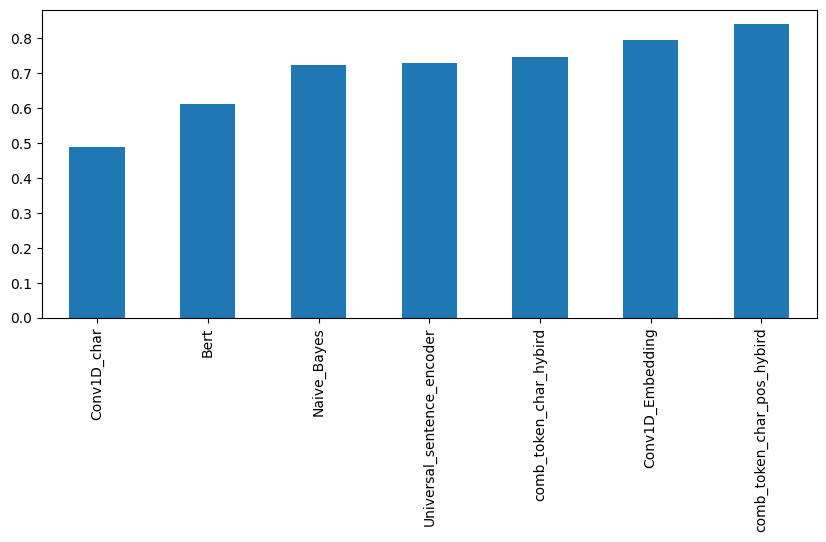

In [143]:
result_comp.sort_values(by=["recall"],ascending=True)["recall"].plot(kind="bar",figsize=(10,4))

## Model Saving and Loading

In [ ]:
# Save the entire model as a `.keras` zip archive.
model_6.save('my_model.keras')


In [ ]:
loaded_model_6  = tf.keras.models.load_model('my_model.keras')
